In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer

# Data Understanding

*   age - age of the patient (int)
*   sex - sex patient identifies (str)
*   on_thyroxine - whether patient is on thyroxine (bool)
*   query on thyroxine - *whether patient is on thyroxine (bool)
*   on antithyroid meds - whether patient is on antithyroid meds (bool)
*   sick - whether patient is sick (bool)
*   pregnant - whether patient is pregnant (bool)
*   thyroid_surgery - whether patient has undergone thyroid surgery (bool)
*   I131_treatment - whether patient is undergoing I131 treatment (bool)
*   query_hypothyroid - whether patient believes they have hypothyroid (bool)
*   query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
*   lithium - whether patient * lithium (bool)
*   goitre - whether patient has goitre (bool)
*   tumor - whether patient has tumor (bool)
*   hypopituitary - whether patient * hyperpituitary gland (float)
*   psych - whether patient * psych (bool)
*   TSH_measured - whether TSH was measured in the blood (bool)
*   TSH - TSH level in blood from lab work (float)
*   T3_measured - whether T3 was measured in the blood (bool)
*   T3 - T3 level in blood from lab work (float)
*   TT4_measured - whether TT4 was measured in the blood (bool)
*   TT4 - TT4 level in blood from lab work (float)
*   T4U_measured - whether T4U was measured in the blood (bool)
*   T4U - T4U level in blood from lab work (float)
*   FTI_measured - whether FTI was measured in the blood (bool)
*   FTI - FTI level in blood from lab work (float)
*   TBG_measured - whether TBG was measured in the blood (bool)
*   TBG - TBG level in blood from lab work (float)
*   referral_source - (str)
*   target - hyperthyroidism medical diagnosis (str)
*   patient_id - unique id of the patient (str)

In [ ]:
df = pd.read_csv('thyroidDF.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'thyroidDF.csv'

In [ ]:
df.head() #Melihat 5 baris pertama

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
df.describe() #Statistik deskriptif

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [ ]:
df.isna().sum() #Cek missing values

,0
age,0
sex,307
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [ ]:
df['target'].unique() #Nilai unik target

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
hyperthyroid_conditions = ['A', 'B', 'C', 'D', 'O', 'P', 'Q', 'S', 'T']
hypothyroid_conditions = ['E', 'F', 'G', 'H']
normal_conditions = ['-']

def categorize_target(value):
    diagnoses = value.split('|')
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
    for diagnosis in diagnoses:
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'

    for diagnosis in diagnoses:
        if diagnosis in normal_conditions:
            return 'Healthy'

df['target'] = df['target'].apply(categorize_target)

In [ ]:
df['target'].unique()

array(['Healthy', 'Hyperthyroid', 'Hypothyroid', None], dtype=object)

In [ ]:
df['target'].isnull().sum()

np.int64(1487)

# Data Cleaning

In [ ]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [ ]:
df['sex'].isna().sum()

np.int64(0)

In [ ]:
columns_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id']
df.drop(columns_to_drop, axis = 1, inplace = True)

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG', 'referral_source', 'target'],
      dtype='object')

In [ ]:
columns_to_fill = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
df[columns_to_fill] = SimpleImputer(strategy='constant', fill_value=0).fit_transform(df[columns_to_fill])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

df.to_csv("thyroid_cleaned.csv", index=False)

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f']
Unique values in psych: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Healthy' 'Hyperthyroid' 'Hypothyroid']


In [ ]:
df.drop('hypopituitary', axis = 1, inplace = True)

In [ ]:
df = df[df['age'] <= 100]
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       67, 61, 46, 44, 82, 64, 70, 33, 53, 52, 59, 49, 35, 48, 27, 69, 76,
       73, 68, 66, 30, 58, 21, 38, 45, 62, 25, 86, 83, 75, 72, 55, 14, 15,
       39, 20, 80, 90, 23, 13, 78, 24, 71, 81, 92, 57, 74,  9, 47, 17, 11,
       50, 26, 34,  8, 79, 31, 65, 84, 12, 10, 88, 18,  1, 22,  2, 97,  6,
       19, 89, 87, 91, 94,  7,  4,  3, 93,  5, 95])

In [ ]:
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target


In [ ]:
obj_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')
        obj_col.append(i)

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Healthy' 'Hyperthyroid' 'Hypothyroid']


# Data Encoding

In [ ]:
print(df['referral_source'].unique()) #Mengecek nilai unik di kolom 'referral_source' sebelum encoding

['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']


In [ ]:
le = LabelEncoder() #Inisialisasi LabelEncoder

In [ ]:
df['sex'] = df['sex'].map({'F':0, 'M':1}) #Encoding kolom 'sex'

In [ ]:
df['referral_source'] = le.fit_transform(df['referral_source']) #Encoding kolom 'referral_source'

In [ ]:
#Mengkonversi semua kolom object (kecuali 'target') dari 't'/'f' ke 0/1
for i in df.columns:
    if df[i].dtype == 'object' and i != 'target':
        df[i] = df[i].map({'f':0, 't':1})

In [ ]:
#Verifikasi hasil encoding
for i in obj_col:
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: [0 1]
Unique values in on_thyroxine: [0 1]
Unique values in query_on_thyroxine: [0 1]
Unique values in on_antithyroid_meds: [0 1]
Unique values in sick: [0 1]
Unique values in pregnant: [0 1]
Unique values in thyroid_surgery: [0 1]
Unique values in I131_treatment: [0 1]
Unique values in query_hypothyroid: [1 0]
Unique values in query_hyperthyroid: [0 1]
Unique values in lithium: [0 1]
Unique values in goitre: [0 1]
Unique values in tumor: [0 1]
Unique values in psych: [0 1]
Unique values in referral_source: [5 3 1 0 2 4]
Unique values in target: ['Healthy' 'Hyperthyroid' 'Hypothyroid']


# Data Visualization

<ipython-input-42-8529428a736f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='viridis')


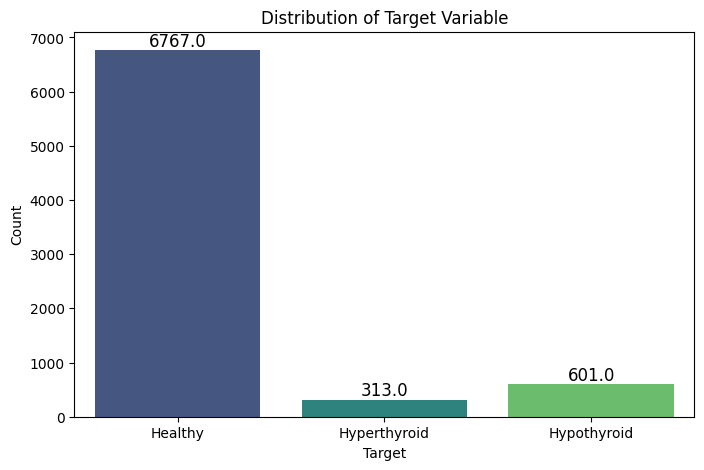

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='target', data=df, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

Data Visualizaton

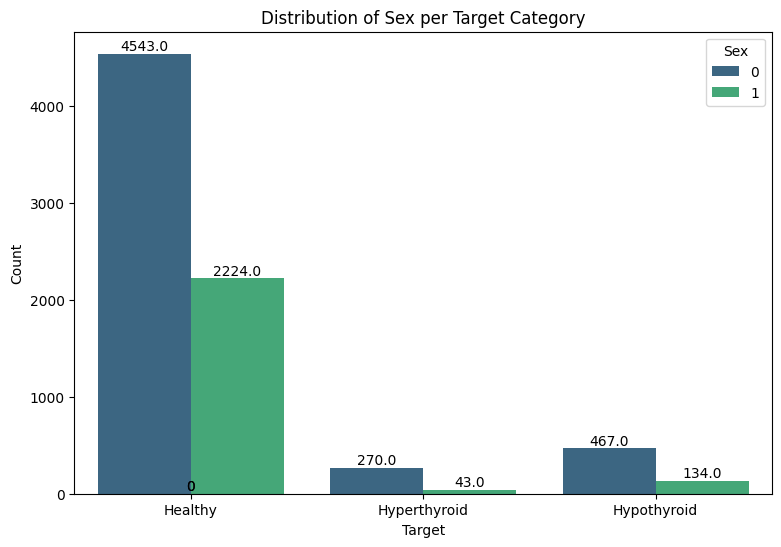

In [ ]:
plt.figure(figsize=(9,6))

ax = sns.countplot(x='target', hue='sex', data=df, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Sex per Target Category')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(title='Sex')

plt.show()

In [ ]:
!pip install catboost optuna xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.1 MB/s eta 0:00:00


# Data Split

In [ ]:
#Memisahkan fitur (X) dan target (y)
x = df.drop('target', axis = 1)
y = df['target']

In [ ]:
#Split data dengan proporsi 20% testing dan 80% training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Verifikasi distribusi kelas di data training
np.unique(y_train)

array(['Healthy', 'Hyperthyroid', 'Hypothyroid'], dtype=object)

# Data Modelling

Stacking CatBoost, GradientBoost, XGBoost

In [ ]:
import numpy as np
import optuna
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

target_map = {'Hyperthyroid': 0, 'Hypothyroid': 1, 'Healthy': 2}
y_train_encoded = y_train.map(target_map)
y_test_encoded = y_test.map(target_map)

y_test_binarized = label_binarize(y_test, classes=['Hyperthyroid', 'Hypothyroid', 'Healthy'])

sample_weights_cb = compute_sample_weight(class_weight='balanced', y=y_train)
y_train_encoded = np.vectorize(target_map.get)(y_train)
sample_weights_xgb = compute_sample_weight(class_weight='balanced', y=y_train_encoded)

# CatBoost
cat = CatBoostClassifier(auto_class_weights='Balanced', verbose=False, random_state=42)
cat.fit(x_train, y_train)

# GradientBoosting
gb = GradientBoostingClassifier(random_state=10)
gb.fit(x_train, y_train, sample_weight=sample_weights_cb)

# XGBoost
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train, y_train_encoded, sample_weight=sample_weights_xgb)

cat_proba = cat.predict_proba(x_test)
gb_proba = gb.predict_proba(x_test)
xgb_proba = xgb.predict_proba(x_test)

def objective(trial):
    w_cat = trial.suggest_float("w_cat", 0, 1)
    w_gb = trial.suggest_float("w_gb", 0, 1 - w_cat)
    w_xgb = 1 - w_cat - w_gb

    combined_proba = w_cat * cat_proba + w_gb * gb_proba + w_xgb * xgb_proba

    score = average_precision_score(y_test_binarized, combined_proba, average='micro')
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

#Mengambil bobot terbaik
best_weights = study.best_params
w_cat = best_weights['w_cat']
w_gb = best_weights['w_gb']
w_xgb = 1 - w_cat - w_gb

combined_proba = w_cat * cat_proba + w_gb * gb_proba + w_xgb * xgb_proba
combined_pred = np.argmax(combined_proba, axis=1)

print("\nBest Weights Found by Optuna:")
print(f"CatBoost: {w_cat:.3f}, GradientBoosting: {w_gb:.3f}, XGBoost: {w_xgb:.3f}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_encoded, combined_pred)}")
print(f"Accuracy: {accuracy_score(y_test_encoded, combined_pred)}")
print(f"Micro Average Precision: {average_precision_score(y_test_binarized, combined_proba, average='micro')}")

for i, class_label in enumerate(['Hyperthyroid', 'Hypothyroid', 'Healthy']):
    print(f"Class {class_label}: Average Precision = {average_precision_score(y_test_binarized[:, i], combined_proba[:, i])}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-01 12:53:21,626] A new study created in memory with name: no-name-91f45bbd-47ed-4eaa-a258-9ef7ca052f8b
[I 2025-06-01 12:53:21,632] Trial 0 finished with value: 0.30507954137421894 and parameters: {'w_cat': 0.6479236119480055, 'w_gb': 0.14964289092349325}. Best is trial 0 with value: 0.30507954137421894.
[I 2025-06-01 12:53:21,638] Trial 1 finished with value: 0.30535093273595143 and parameters: {'w_cat': 0.5838248903891656, 'w_gb': 0.16929929650309097}. Best is trial 1 with value: 0.30535093273595143.
[I 2025-06-01 12:53:21,642] Trial 2 finished with value: 0.30374745890651744 and parameters: {'w_cat': 0.8140114569401855, 'w_gb': 0.06617948597060644}. Best is trial 1 with value: 0.30535093273595143.
[I 2025-06-01 12:53:21,647] Trial 3 finished with value: 0.301034172


Best Weights Found by Optuna:
CatBoost: 0.002, GradientBoosting: 0.011, XGBoost: 0.987

Confusion Matrix:
[[  55    2    6]
 [   0  118    2]
 [  11    2 1341]]
Accuracy: 0.9850357839947951
Micro Average Precision: 0.9960440229614973
Class Hyperthyroid: Average Precision = 0.8801350341644625
Class Hypothyroid: Average Precision = 0.9923409349131634
Class Healthy: Average Precision = 0.9993548986729854


# Model Evaluation

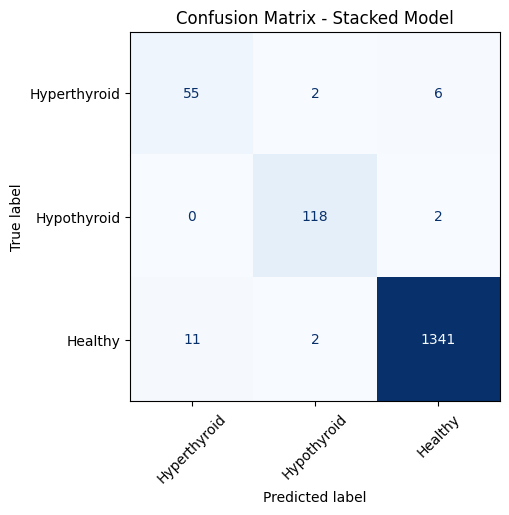

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test_encoded, combined_pred,
    display_labels=['Hyperthyroid', 'Hypothyroid', 'Healthy'],
    cmap=plt.cm.Blues,
    colorbar=False,
    xticks_rotation=45
)
plt.title('Confusion Matrix - Stacked Model')
plt.show()


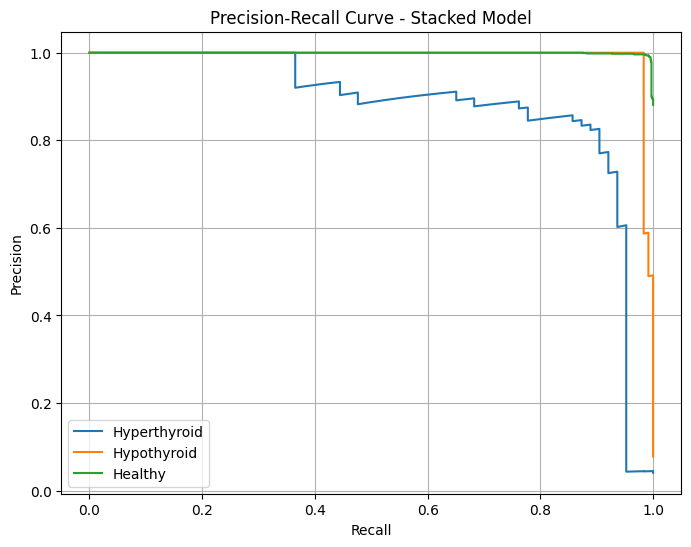

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))

for i, class_label in enumerate(['Hyperthyroid', 'Hypothyroid', 'Healthy']):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], combined_proba[:, i])
    plt.plot(recall, precision, label=f'{class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Stacked Model')
plt.legend()
plt.grid(True)
plt.show()